In [1]:
# lab 3 Знайомство з нейромережами

In [2]:
# 1 Повнозв'язані нейронні мережі

In [3]:
from sklearn import preprocessing
import pandas as pd

df = pd.read_csv("../lab1/diabetes.csv")
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=list(df))
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [4]:
from sklearn.model_selection import train_test_split
import torch

# Extract features (X) and target variable (y) from the DataFrame
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors for compatibility with PyTorch models
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [5]:
import torch.nn as nn

# Define the NeuralNetwork class inheriting from nn.Module
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        
        # Define the first fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Apply Rectified Linear Unit (ReLU) activation function
        self.relu = nn.ReLU()

        # Define the second fully connected layer
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Apply Sigmoid activation function to squash the output between 0 and 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through the first fully connected layer
        x = self.fc1(x)

        # Apply ReLU activation function
        x = self.relu(x)

        # Forward pass through the second fully connected layer
        x = self.fc2(x)

        # Apply Sigmoid activation function to obtain final output
        x = self.sigmoid(x)

        return x

# Set the input, hidden, and output sizes
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

# Instantiate the NeuralNetwork model
model = NeuralNetwork(input_size, hidden_size, output_size)

In [6]:
from sklearn.metrics import accuracy_score
import torch.optim as optim

# Set hyperparameters
learning_rate = 0.001  
num_epochs = 1000  

# Define binary cross-entropy loss
criterion = nn.BCELoss()  

# Initialize Adam optimizer with model parameters and learning rate
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

# Reshape target variables to match the model's output
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

# Initialize a dictionary to store training history
history = {'loss':[], 'accuracy':[]}  

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)  
    
    # Calculate the loss
    loss = criterion(outputs, y_train)  
    
    # Zero gradients, backward pass, and optimization step
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  
    
    # Print progress and evaluate model every 100 epochs
    if (epoch + 1) % 100 == 0:
        with torch.no_grad():
            # Make predictions on the test set
            y_pred = model(X_test)  
            
            # Convert predictions to binary (0 or 1) based on a threshold of 0.5
            y_pred = (y_pred >= 0.5).float()  
            
            # Calculate accuracy using sklearn's accuracy_score
            accuracy = accuracy_score(y_test, y_pred)  
        
        # Save loss and accuracy in the history dictionary
        history['loss'].append(loss.item()) 
        history['accuracy'].append(accuracy)
        
        # Print epoch, loss, and accuracy
        print(f'Epoch [{epoch + 1}/{num_epochs}], loss: {loss.item()}, accuracy: {accuracy}')


Epoch [100/1000], loss: 0.5976904630661011, accuracy: 0.6623376623376623
Epoch [200/1000], loss: 0.5274870991706848, accuracy: 0.7467532467532467
Epoch [300/1000], loss: 0.4821474254131317, accuracy: 0.7662337662337663
Epoch [400/1000], loss: 0.45707589387893677, accuracy: 0.7662337662337663
Epoch [500/1000], loss: 0.44436579942703247, accuracy: 0.7532467532467533
Epoch [600/1000], loss: 0.4358822703361511, accuracy: 0.7532467532467533
Epoch [700/1000], loss: 0.42973291873931885, accuracy: 0.7532467532467533
Epoch [800/1000], loss: 0.42424264550209045, accuracy: 0.7532467532467533
Epoch [900/1000], loss: 0.4193243980407715, accuracy: 0.7467532467532467
Epoch [1000/1000], loss: 0.4148680865764618, accuracy: 0.7467532467532467


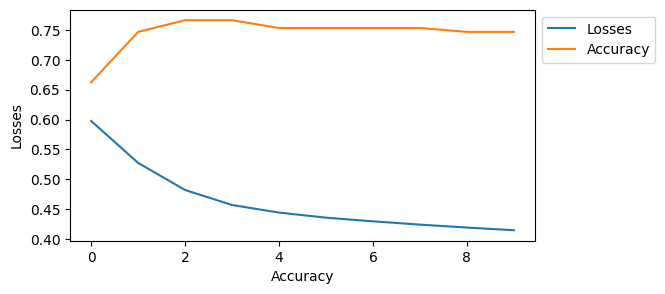

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(history['loss'])
plt.plot(history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

lab 1 result comparsion
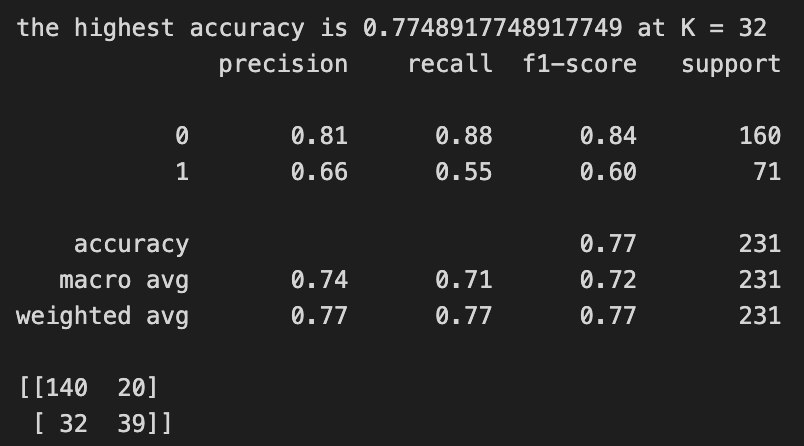

In [8]:
# 2 Згорткові нейронні мережі

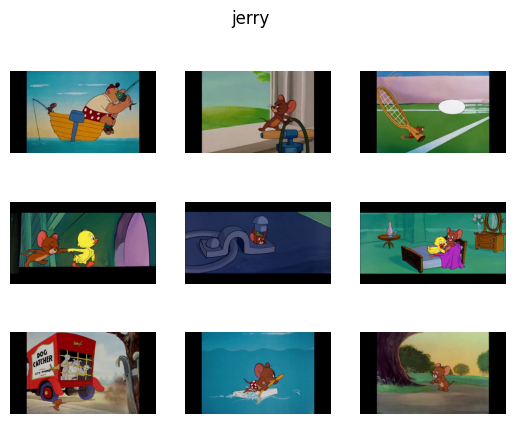

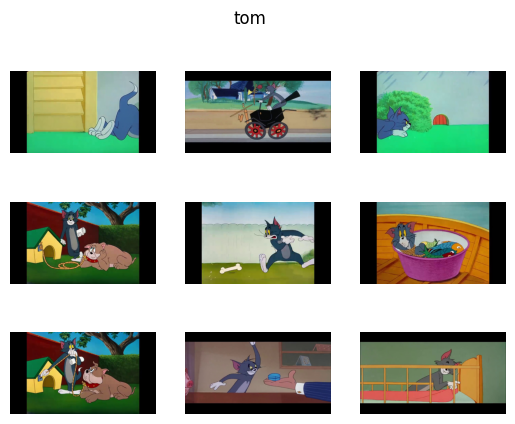

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

path = 'tom_and_jerry/tom_and_jerry/'
categories = ['jerry', 'tom']

# Load and display images
for category in categories:
    fig, axs = plt.subplots(3, 3)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path + category)[:9]):
        img = plt.imread(path + category + '/' + v)
        axs[k // 3, k % 3].imshow(img)
        axs[k // 3, k % 3].axis('off')
    plt.show()

X = []
y = []

# Load and preprocess images
for k, category in enumerate(categories):
    for f in os.listdir(path + category):
        image_path = path + category + '/' + f
        image = cv2.imread(image_path)
        image = cv2.resize(image, (55, 32))
        image = image / 255.0  
        X.append(image)
        y.append(k)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Embedding, LSTM
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

# Converting labels to categorical format
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# Creating a Sequential model
model = Sequential()

# Adding a 2D convolutional layer with 32 filters, a 2x2 kernel, and ReLU activation
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(32, 55, 3)))

# Adding a 2D max pooling layer with a 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening the output to feed into dense layers
model.add(Flatten())

# Adding a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Adding the output layer with 2 neurons and softmax activation for classification
model.add(Dense(2, activation='softmax'))

# Compiling the model with categorical cross-entropy loss, accuracy metric, and Adam optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Training the model on the training data for 15 epochs with a batch size of 32
history = model.fit(X_train, y_train, batch_size=32, epochs=15)


Epoch 1/15
80/80 [==============================] - 1s 11ms/step - loss: 0.5186 - accuracy: 0.7461
Epoch 2/15
80/80 [==============================] - 1s 14ms/step - loss: 0.3043 - accuracy: 0.8797
Epoch 3/15
80/80 [==============================] - 1s 13ms/step - loss: 0.2017 - accuracy: 0.9251
Epoch 4/15
80/80 [==============================] - 1s 14ms/step - loss: 0.1455 - accuracy: 0.9487
Epoch 5/15
80/80 [==============================] - 1s 17ms/step - loss: 0.0991 - accuracy: 0.9688
Epoch 6/15
80/80 [==============================] - 1s 16ms/step - loss: 0.0817 - accuracy: 0.9736
Epoch 7/15
80/80 [==============================] - 1s 14ms/step - loss: 0.0532 - accuracy: 0.9854
Epoch 8/15
80/80 [==============================] - 1s 14ms/step - loss: 0.0374 - accuracy: 0.9925
Epoch 9/15
80/80 [==============================] - 1s 13ms/step - loss: 0.0323 - accuracy: 0.9925
Epoch 10/15
80/80 [==============================] - 1s 13ms/step - loss: 0.0167 - accuracy: 0.9976
Epoch 11/

Losses: 0.3922988772392273
Accuracy: 0.9353312253952026


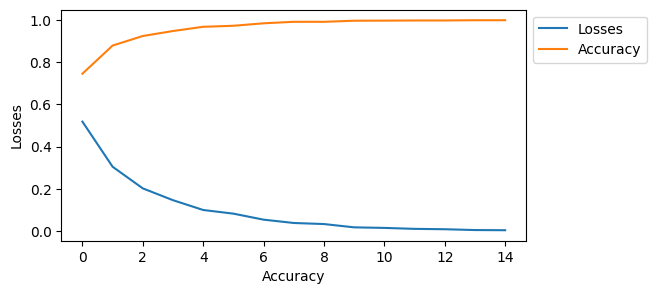

In [11]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [12]:
# 3 Рекурентні нейронні мережі

In [13]:
from nltk.corpus import stopwords
from collections import Counter

df = pd.read_csv('../lab2/elden_ring_steam_reviews.csv', encoding='latin-1')
df = df[['review', 'voted_up']]
df = df.dropna()

for i in [True, False]:
    text = ''
    for j in df[df['voted_up'] == i]['review']:
        text += f"{j} "
    custom_stop_words = list(dict(sorted(Counter(text.split()).items(), key=lambda x:x[1], reverse=True)).keys())[:20]

def cleaning(raw_review):
    value = ''.join([c.lower() for c in raw_review if (c.isalpha() or c == ' ')])
    clean_review = ''
    for i in value.split(' '):
        if i not in stopwords.words("english") and i not in custom_stop_words:
            clean_review += i + ' '
    return clean_review


df['review'] = df['review'].apply(cleaning)

X = df['review']
print(X.info())
y = df['voted_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<class 'pandas.core.series.Series'>
Index: 9765 entries, 0 to 9792
Series name: review
Non-Null Count  Dtype 
--------------  ----- 
9765 non-null   object
dtypes: object(1)
memory usage: 152.6+ KB
None


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Tokenize the training data
token = Tokenizer(lower=False)
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

# Calculate the average length of sequences in X_train and set maxlen accordingly
array = []
for i in X_train:
    array.append(len(i))
maxlen = int(np.ceil(np.mean(array)))

# Pad sequences to have uniform length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Determine the total number of unique words in the vocabulary
total_words = len(token.word_index) + 1

model = Sequential()
model.add(Embedding(total_words, 32, input_length=maxlen)) # Embedding layer
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2)) # LSTM layer
model.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid activation
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')  # Compile the model

# Train the model on the preprocessed data
history = model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
214/214 [==============================] - 4s 10ms/step - loss: 0.2697 - accuracy: 0.9390
Epoch 2/10
214/214 [==============================] - 2s 9ms/step - loss: 0.1661 - accuracy: 0.9443
Epoch 3/10
214/214 [==============================] - 2s 9ms/step - loss: 0.1163 - accuracy: 0.9634
Epoch 4/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0834 - accuracy: 0.9760
Epoch 5/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0633 - accuracy: 0.9804
Epoch 6/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 7/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 8/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0377 - accuracy: 0.9881
Epoch 9/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0343 - accuracy: 0.9909
Epoch 10/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0303 - accuracy: 0.991

Losses: 0.26397979259490967
Accuracy: 0.9310580492019653


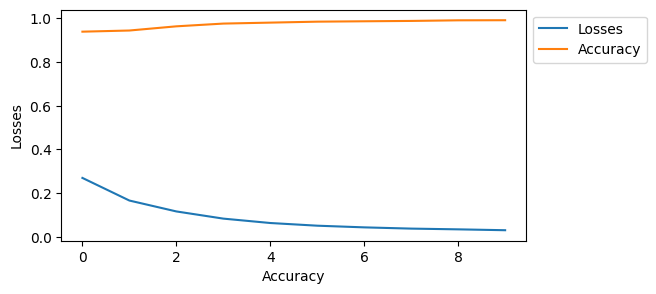

In [15]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

lab 1 result comparsion
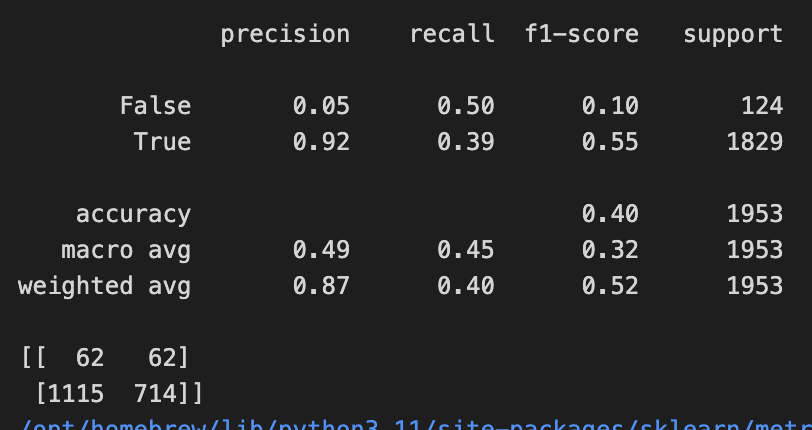